# train100とtest100の分布を比較する

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_jsonl_to_df(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                rows.append(json.loads(line))
    return pd.DataFrame(rows)

TRAIN_FILE = "math_level12_easy_train100_student_with_answer_solution.jsonl"
TEST_FILE  = "math_level12_easy_test100_student.jsonl"

df_train = load_jsonl_to_df(TRAIN_FILE)
df_test  = load_jsonl_to_df(TEST_FILE)

## typeの分布を調べる

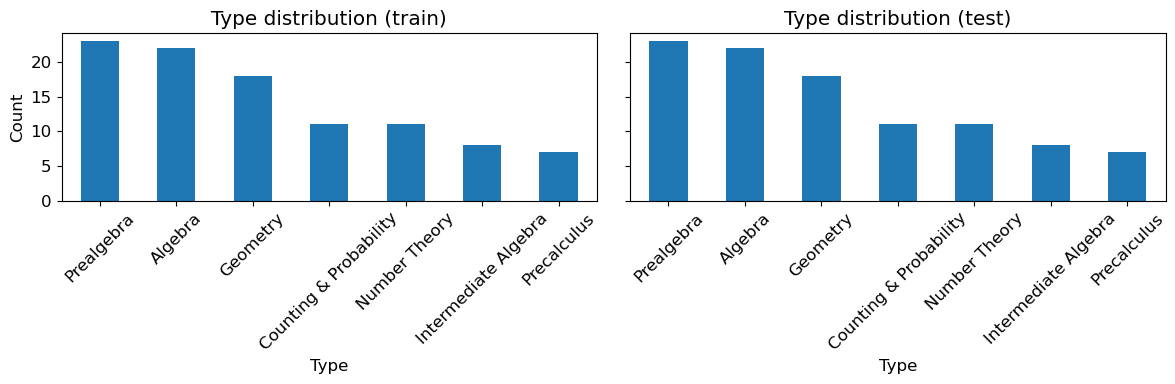

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# train
train_counts = df_train["type"].value_counts()
train_counts.plot(kind="bar", ax=axes[0])
axes[0].set_title("Type distribution (train)")
axes[0].set_xlabel("Type")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# test
test_counts = df_test["type"].value_counts()
test_counts.plot(kind="bar", ax=axes[1])
axes[1].set_title("Type distribution (test)")
axes[1].set_xlabel("Type")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [57]:
type_train_counts = df_train["type"].value_counts().sort_index()
type_test_counts  = df_test["type"].value_counts().sort_index()

type_counts_df = pd.DataFrame({
    "train": type_train_counts,
    "test": type_test_counts
}).fillna(0).astype(int)

type_counts_df

,train,test
type,,
Algebra,22,22
Counting & Probability,11,11
Geometry,18,18
Intermediate Algebra,8,8
Number Theory,11,11
Prealgebra,23,23
Precalculus,7,7


全く同じ分布になっている

## levelの分布を調べる

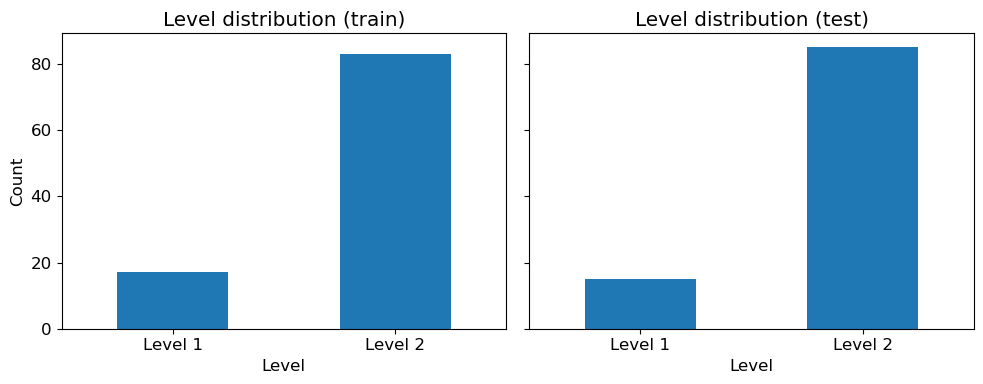

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# train
train_lv_counts = df_train["level"].value_counts().sort_index()
train_lv_counts.plot(kind="bar", ax=axes[0])
axes[0].set_title("Level distribution (train)")
axes[0].set_xlabel("Level")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=0)

# test
test_lv_counts = df_test["level"].value_counts().sort_index()
test_lv_counts.plot(kind="bar", ax=axes[1])
axes[1].set_title("Level distribution (test)")
axes[1].set_xlabel("Level")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()

In [56]:
level_train_counts = df_train["level"].value_counts().sort_index()
level_test_counts  = df_test["level"].value_counts().sort_index()

level_counts_df = pd.DataFrame({
    "train": level_train_counts,
    "test": level_test_counts
}).fillna(0).astype(int)

level_counts_df

,train,test
level,,
Level 1,17,15
Level 2,83,85


こちらもほとんど同じ分布になっている